# Titanic: Machine Learning from Disaster
##### Created by Imran Ture

[Problem](#problem)<br>
[Overview of the Data](#dataset)<br>
[I. Acquire and Preview Data](#first)<br>
[II. Pivoting Data](#second)<br>
[III. Data Visualization](#third)<br>
[IV. Data Wrangling](#fourth)<br>
[V. Model, Predict, and Solve](#fifth)<br>
[VI. Submission](#sixth)<br>
[Reference](#reference)

## Problem <a id = "problem"></a>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

We are asked to complete the following tasks:
- Analysis of what sorts of people were likely to survive.
- Apply the tools of machine learning to predict which passengers survived the tragedy.

Our goal is to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, we must predict a 0 or 1 value for the Survived variable.

## Overview of the data <a id = "dataset"></a>

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The **training set** is for building our machine learning models.<br><br>
The **test set** is for us to see how well your model performs on unseen data.

| Variable | Definition | Description |
| :-- | :-- | :-- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class |	1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower) |
| sex |	Sex	| |
| Age |	Age in years | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.1 |
| sibsp | # of siblings / spouses aboard the Titanic | Sibling = brother, sister, stepbrother, stepsister<br>Spouse = husband, wife (mistresses and fiancés were ignored) |
| parch | # of parents / children aboard the Titanic | Parent = mother, father<br>Child = daughter, son, stepdaughter, stepson |
| ticket | Ticket number |	|
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
# Import main libraries
import pandas as pd
import numpy as np
from IPython.display import display

## I. Acquire and Preview Data <a id = "first"></a>

In [2]:
# Acquire data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine_df = [train_df, test_df]

In [3]:
# Preview tha data's columns' heads
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


#### Which features are categorical? Within categorical features are the values nominal, ordinal, ratio, or interval based? 
Among other things this helps us select the appropriate plots for visualization.
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

#### Which features are numerical? Within numerical features are the values discrete, continuous, or timeseries based? 
Among other things this helps us select the appropriate plots for visualization.
Continous: Age, Fare. Discrete: SibSp, Parch.

In [4]:
# Preview both training and test datasets
print()
print("train_df")
display(train_df.head())
display(train_df.tail())
print()
print("test_df")
display(test_df.head())
display(test_df.tail())


train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#### Which features are mixed data types?
Numerical and alphanumeric data are within same feature. These are candidates for correcting goal.
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

#### Which features may contain errors or typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

#### Which features contain blank, null or empty values?
These will require correcting.
Cabin, Age, and Embarked features contain a number of null values in that order for the training dataset.
Cabin and Age are incomplete in case of test dataset.

#### What are the data types for various features?
This helps while converting goal.
7 features are integer or floats. 6 in case of test dataset.
5 features are strings (object).

In [5]:
print("train_df")
train_df.info()
print()
print("test_df")
test_df.info()

train_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

test_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### What is the distribution of numerical feature values across the samples?
This helps to determine how representative is the training dataset of the actual problem domain.
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Most passengers were lower-class passengers.
- There is no Age data for nearly 20% of the passengers.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [7]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leyson, Mr. Robert William Norman",male,1601,B96 B98,S
freq,1,577,7,4,644


#### What is the distribution of categorical features?
- All the names are unique across the dataset.
- Sex variable has two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Conclusions reached based on data analysis

- We want to know how well does each feature correlate with Survival. 
- Age and Embarked features may be correlated to survival.<br><br>

- Age feature should be completed since we may use it in our model.
- Embarked feature should be completed since we may use it in our model.<br><br>

- We can drop Ticket feature from the data since it contains high ratio of duplicates (22%), and also it is most likely that there is no a correlation between Ticket and survival.
- We can also get rid of Cabin feature since it contains many incomplete or null values.
- PassengerId may be dropped from training dataset as it does not contribute to survival.
- Name feature probably will not contribute directly to survival, so maybe dropped.<br><br>

- A new feature called Family can be the total count of family members based on Parch and SibSp features.
- We may extract titles from the Name feature and add them to a new feature called Title.
- We can turn the Age feature from a continous numerical feature into an ordinal categorical feature, so it will ease our job to analyze ages and to make correlation to survivals.
- We may also add a Fare range feature.<br><br>

- Women (Sex=Female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

## II. Pivoting Data <a id = "second"></a>
Let's confirm our assumptions by pivoting features against each other to analyze correlations.

### 1. Pclass

In [8]:
train_df[["Pclass", "Survived"]].groupby("Pclass").mean().sort_values(by = "Survived", ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


There is a significant correlation among upper-class passengers (Pclass = 1) and Survived.

### 2. Sex

In [9]:
train_df[["Sex", "Survived"]].groupby("Sex", as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


As expected, there is a strong correlation among females (Sex = 0) and Survived. Women had very high survival rate at 74%.

### 3. Siblings / Spouses

In [10]:
train_df[["SibSp", "Survived"]].groupby("SibSp").mean().sort_values(by = "Survived", ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


For some values, there are no correlations at all. Deriving a new feature based on this feature and analyze it may give better results.

### 4. Parents / Children

In [11]:
train_df[["Parch", "Survived"]].groupby("Parch").mean().sort_values(by = "Survived", ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


For some values, there are no correlations at all. Deriving a new feature based on this feature and analyze it may give better results.

## III. Data Visualization <a id = "third"></a>
Let's confirm our assumptions by data visualization.

In [12]:
# Import libraries regarding visualization
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Age

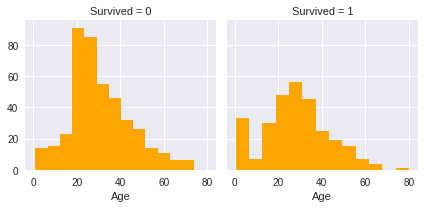

In [13]:
age = sbn.FacetGrid(train_df, col = "Survived")
age.map(plt.hist, "Age", bins = 13, color = "orange")

#### Observations
- Infants (Age <= 4) had high survival rate.
- Oldest passengers (around 80 years old) survived.
- Large number of young people (20-30 age range) did not survive.
- Most passengers are in 15-40 age range.

#### Decisions
- Age feature should be used in our model.
- Null values in Age feature should be filled.
- Age groups should be created as a new feature.

### 2. Pclass & Age
Let's correlate numerical and ordinal features.

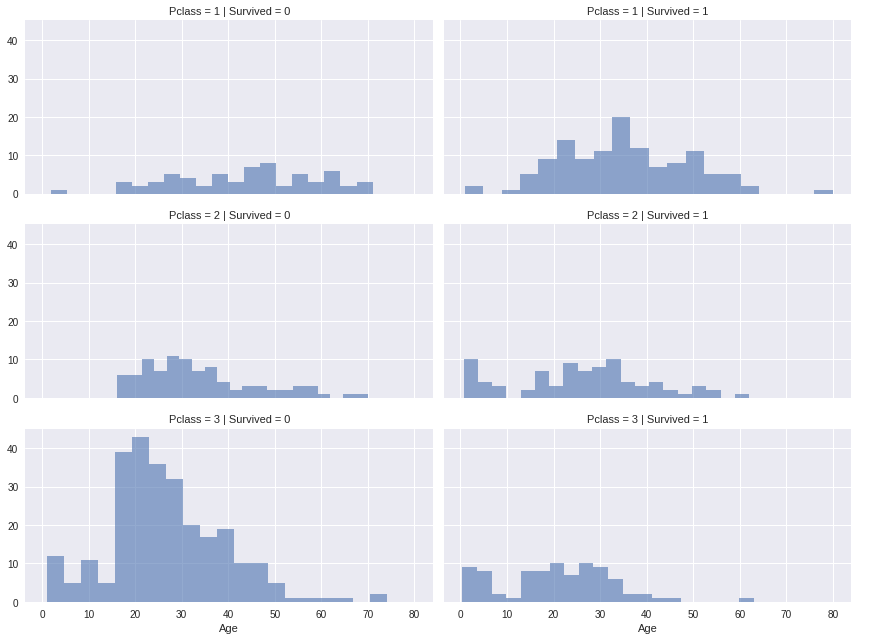

In [14]:
pa = sbn.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 3, aspect = 2)
pa.map(plt.hist, "Age", alpha = 0.6, bins = 20)
pa.add_legend();

#### Observations
- The lower class (Pclass = 3) had most passengers, but most (mostly 20-30 age range) did not survive.
- On the other hand, most passengers from the upper class (Pclass = 1) survived compared to the lower class (Pclass = 3).
- Infants (Age <= 4) in Pclass = 2 and Pclass = 3 mostly survived.

#### Decisions
- We will consider Pclass for model training.

### 3. Embarked & Pclass & Sex
Let's correlate categorical features.

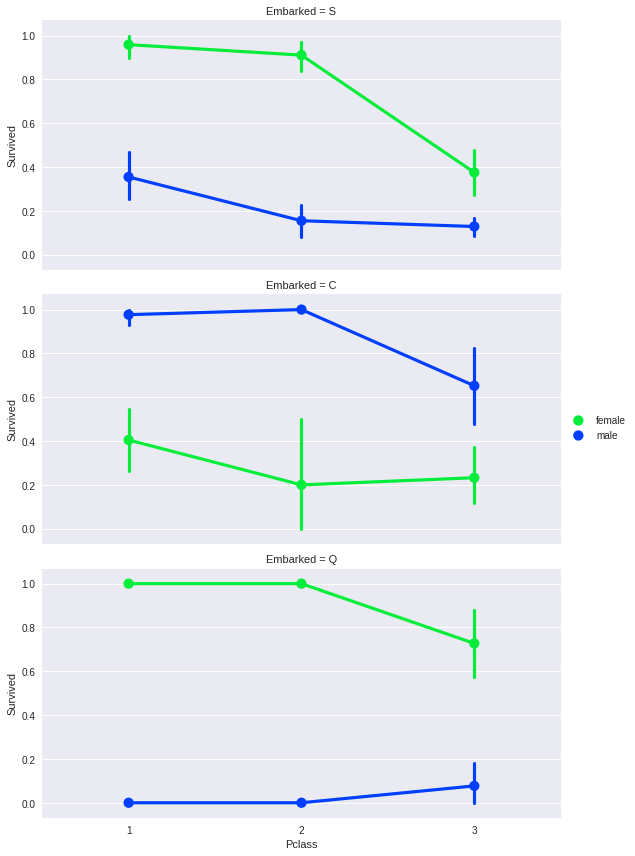

In [15]:
esp = sbn.FacetGrid(train_df, row = "Embarked", size = 4, aspect = 2)
esp.map(sbn.pointplot, "Pclass", "Survived", "Sex", palette = "bright")
esp.add_legend()

#### Observations
- Female passengers had much better survival rate than male passengers.
- Exception is when Embarked = C, where males had higher survival rate.
- Ports of embarkation have varying survival rates. For example, male passengers had much better survival rate for Embarked = C than for Embarked = Q.

#### Decisions
- We will add the Sex feature to our model.
- We will complete and also add the Embarked feature to our model.

### 4. Fare & Embarked & Sex
Let's correlate categorical features and numerical features: Correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Continuous numeric), with Survival (Categorical numeric).

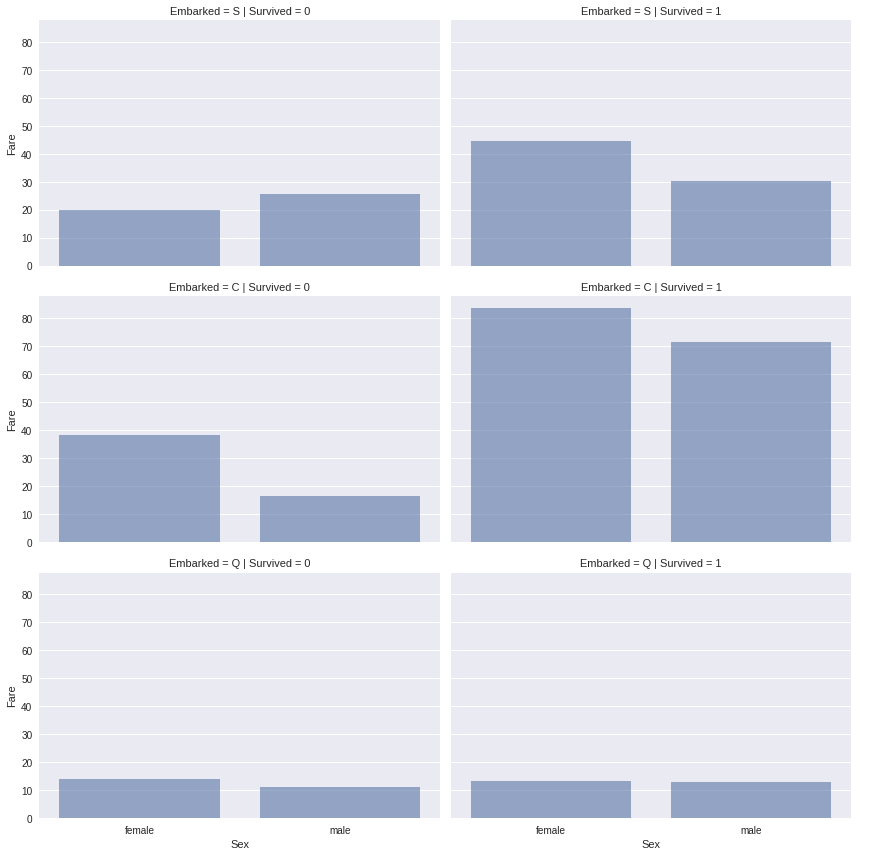

In [16]:
esf = sbn.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 4, aspect = 1.5)
esf.map(sbn.barplot, "Sex", "Fare", alpha = 0.6, ci = None)
esf.add_legend()

#### Observations
- Higher fare paying passengers had better survival rates.
- Port of embarkation correlates with survival rates.

#### Decisions
- We will add the Fare feature to our model.

## IV. Data Wrangling <a id = "fourth"></a>
We have now assumptions and decisions regarding our dataset and solution requirements. It is time to prepare our data to our model based on what we have learned so far.

### Eliminate features
By eliminating useless features, our job will become easier and faster. Therefore, we will eliminate the Ticket and the Cabin features.

In [17]:
print ("Before", train_df.shape, test_df.shape)

# Note: axis = 1 denotes that we are referring to a column, not a row
train_df = train_df.drop(["Ticket", "Cabin"], axis = 1)
test_df = test_df.drop(["Ticket", "Cabin"], axis = 1)
combine_df = [train_df, test_df]

print ("After", train_df.shape, test_df.shape)
print()
print("train_df")
train_df.info()
print()
print("test_df")
test_df.info()

Before (891, 12) (418, 11)
After (891, 10) (418, 9)

train_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB

test_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null obje

### Create new features by extracting from existing ones

Let's see if we can engineer the Name feature to extract a new feature called Title by testing correlation between titles and survival.

In [18]:
# The RegEx pattern matches the first word which ends with a dot character within Name feature.
# The "expand = False" returns a dataframe.
for dataset in combine_df:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand = False)

pd.crosstab(train_df["Title"], train_df["Sex"], margins = True)

Sex,female,male,All
Title,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40


There are many titles than we need. Let's replace some common titles with a more common name, and classify rare ones as <mark>Rare</mark>.

In [19]:
for dataset in combine_df:
    
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
    dataset["Title"] = dataset["Title"].replace(["Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Lady", "Major", "Rev", "Sir"], "Rare")

train_df[["Title", "Survived", "Age"]].groupby(["Title"], as_index = False).mean()

,Title,Survived,Age
0,Master,0.575000,4.574167
1,Miss,0.702703,21.845638
2,Mr,0.156673,32.368090
3,Mrs,0.793651,35.788991
4,Rare,0.347826,45.545455


Let's now convert these categorical titles to ordinal.

In [20]:
for dataset in combine_df:
    dataset["Title"] = dataset["Title"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset["Title"] = dataset["Title"].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Since we have the Title feature now, we do not need the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [21]:
print ("Before", train_df.shape, test_df.shape)
train_df = train_df.drop(["PassengerId", "Name"], axis = 1)
test_df = test_df.drop(["Name"], axis = 1)
combine_df = [train_df, test_df]
print ("After", train_df.shape, test_df.shape)

Before (891, 11) (418, 10)
After (891, 9) (418, 9)


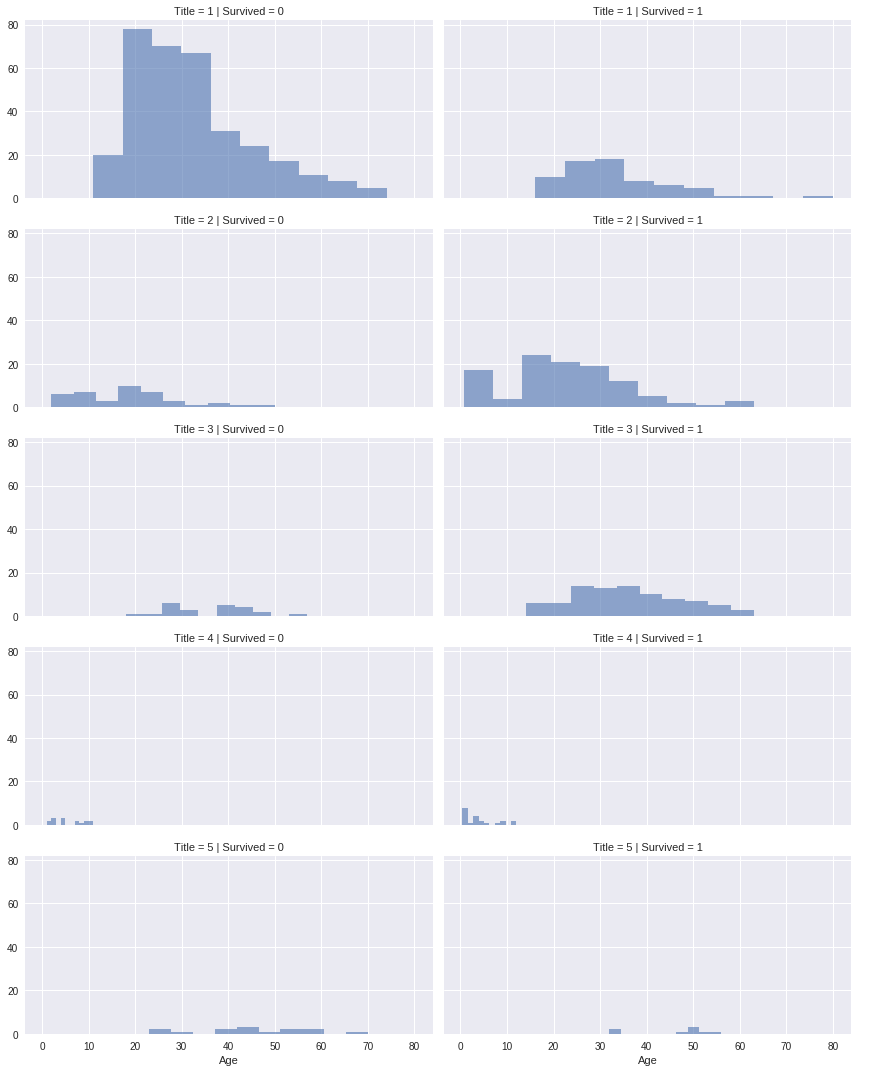

In [22]:
ta = sbn.FacetGrid(train_df, col = "Survived", row = "Title", size = 3, aspect = 2)
ta.map(plt.hist, "Age", alpha = 0.6, bins = 10)
ta.add_legend();

#### Observations
- Titles seems to band Age groups correctly. For instance, the average age of passengers with the title Master is about 5.
- The title with the least survival rate is <mark>Mr.</mark> as expected.

#### Decisions
- We will retain the Title feature for our model training.

### Convert a categorical feature¶

Converting features which contain strings to numerical values will let use them in our model.<br>
First, let's convert Sex feature to a new feature called Gender where female = 1 and male = 0.

In [23]:
train_df = pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis = 1)
test_df = pd.concat([test_df, pd.get_dummies(test_df["Sex"])], axis = 1)
combine_df = [train_df, test_df]
for dataset in combine_df:
    dataset.rename(columns = {"female": "Gender (Female)"}, inplace = True)
    dataset.rename(columns = {"male": "Gender (Male)"}, inplace = True)

In [24]:
for dataset in combine_df:
    dataset["Sex"] = dataset["Sex"].map({"female": 1, "male": 0}).astype(int)
    dataset.rename(columns = {"Sex": "Gender"}, inplace = True)
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title,Gender (Female),Gender (Male)
0,0,3,0,22.0,1,0,7.2500,S,1,0,1
1,1,1,1,38.0,1,0,71.2833,C,3,1,0
2,1,3,1,26.0,0,0,7.9250,S,2,1,0
3,1,1,1,35.0,1,0,53.1000,S,3,1,0
4,0,3,0,35.0,0,0,8.0500,S,1,0,1


,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title,Gender (Female),Gender (Male)
0,892,3,0,34.5,0,0,7.8292,Q,1.0,0,1
1,893,3,1,47.0,1,0,7.0000,S,3.0,1,0
2,894,2,0,62.0,0,0,9.6875,Q,1.0,0,1
3,895,3,0,27.0,0,0,8.6625,S,1.0,0,1
4,896,3,1,22.0,1,1,12.2875,S,3.0,1,0


### Complete a numerical continuous feature

We should complete features with missing or null values. Let's start with Age.<br>
There are three methods to complete a numerical continuous feature:
1. Generate random numbers between mean and standard deviation.
2. Use other correlated feature, in this case we note correlation among Age, Gender, and Pclass. For instance, we can use median values for Age across sets of Gender and Pclass feature combinations by finding median of all Age values for Pclass = 1 and Gender = 0, and so on.
3. Combine Method 1 and Method 2.<br>
Method 1 and Method 3 will introduce random noise into the model. Let's go with Method 2.

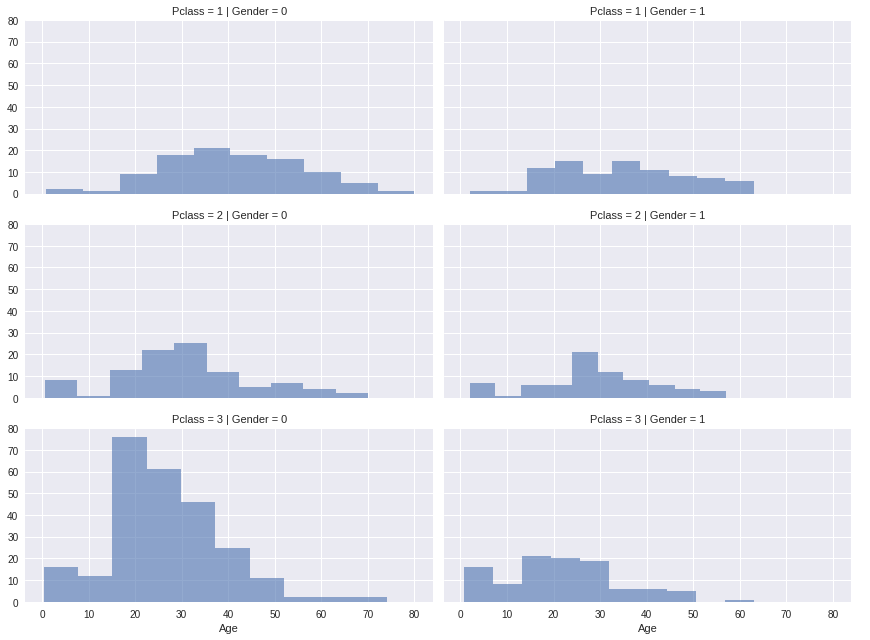

In [25]:
apg = sbn.FacetGrid(train_df, row = "Pclass", col = "Gender", size = 3, aspect = 2)
apg.map(plt.hist, "Age", alpha = 0.6, bins = 10)
apg.add_legend()

Let's create a empty array to contain guessed Age values based on Gender x Pclass combinations.

In [26]:
guessed_ages = np.zeros ((2,3))
guessed_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Now we got a empty array to fill, let's iterate over Gender and Pclass to calculate guessed values of Age.

In [27]:
for dataset in combine_df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset["Gender"] == i) & (dataset["Pclass"] == j+1)]["Age"].dropna()
            
            age_guess = guess_df.median()
            
            # Convert random age float to nearest 0.5 age
            guessed_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Gender == i) & (dataset.Pclass == j + 1), "Age"] = guessed_ages[i, j]
            
    dataset["Age"] = dataset["Age"].astype(int)

print("For the 5th row, the median age for Gender = 0 (male) and Pclass = 3 (3rd class) is 25.")
train_df.head(10)

For the 5th row, the median age for Gender = 0 (male) and Pclass = 3 (3rd class) is 25.


,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title,Gender (Female),Gender (Male)
0,0,3,0,22,1,0,7.2500,S,1,0,1
1,1,1,1,38,1,0,71.2833,C,3,1,0
2,1,3,1,26,0,0,7.9250,S,2,1,0
3,1,1,1,35,1,0,53.1000,S,3,1,0
4,0,3,0,35,0,0,8.0500,S,1,0,1
5,0,3,0,25,0,0,8.4583,Q,1,0,1
6,0,1,0,54,0,0,51.8625,S,1,0,1
7,0,3,0,2,3,1,21.0750,S,4,0,1
8,1,3,1,27,0,2,11.1333,S,3,1,0
9,1,2,1,14,1,0,30.0708,C,3,1,0


Let's create Age ranges to determine correlationns with Survived.

In [28]:
train_df["AgeRange"] = pd.cut(train_df["Age"], 5)
train_df[["AgeRange", "Survived"]].groupby(["AgeRange"], as_index = False).mean().sort_values(by = "AgeRange", ascending = True)

,AgeRange,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


Let's replace Age with ordinal numbers based on these ranges. 

In [29]:
for dataset in combine_df:
    dataset.loc[(dataset["Age"] <= 16), "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4

train_df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title,Gender (Female),Gender (Male),AgeRange
0,0,3,0,1,1,0,7.2500,S,1,0,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,1,0,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,1,0,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,1,0,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,0,1,"(32, 48]"


We do not need AgeRange anymore. Let's remove it.

In [30]:
train_df = train_df.drop(["AgeRange"], axis = 1)
combine_df = [train_df, test_df]
train_df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title,Gender (Female),Gender (Male)
0,0,3,0,1,1,0,7.2500,S,1,0,1
1,1,1,1,2,1,0,71.2833,C,3,1,0
2,1,3,1,1,0,0,7.9250,S,2,1,0
3,1,1,1,2,1,0,53.1000,S,3,1,0
4,0,3,0,2,0,0,8.0500,S,1,0,1


### Create new features combining existing features
We can create a new feature called FamilySize which combines SibSp and Parch. This will allow us to drop SibSp and Parch features from our datasets.

In [31]:
for dataset in combine_df:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Let's create another feature called IsAlone to see whether the passenger has a family or not.

In [32]:
for dataset in combine_df:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1

train_df[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We do not need SibSp and Parch features anymore, so let's remove them. Using IsAlone rather than FamilySize in our model makes more sense, so let's drop FamilySize too.

In [33]:
train_df = train_df.drop(["SibSp", "Parch", "FamilySize"], axis = 1)
test_df = test_df.drop(["SibSp", "Parch", "FamilySize"], axis = 1)
combine_df = [train_df, test_df]

train_df.head()

,Survived,Pclass,Gender,Age,Fare,Embarked,Title,Gender (Female),Gender (Male),IsAlone
0,0,3,0,1,7.2500,S,1,0,1,0
1,1,1,1,2,71.2833,C,3,1,0,0
2,1,3,1,1,7.9250,S,2,1,0,1
3,1,1,1,2,53.1000,S,3,1,0,0
4,0,3,0,2,8.0500,S,1,0,1,1


Let's create one more feature called Age*Class which is a multiplication of Age and Pclass.

In [34]:
for dataset in combine_df:
    dataset["Age*Class"] = dataset["Age"]*dataset["Pclass"]
    
train_df.loc[:, ["Age*Class", "Age", "Pclass"]].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


### Complete a categorical feature
Embarked feature takes S, Q, C values based on port of embarkation. The training dataset has a few missing values. Let's fill these with the most common port value.

In [35]:
freq_port = train_df.Embarked.mode()[0]
freq_port

'S'

In [36]:
for dataset in combine_df:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)

train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by = "Survived", ascending = False)
    

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric
Let's convert the Embarked feature into a new numeric feature called Port.

In [37]:
for dataset in combine_df:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)
    dataset.rename(columns = {"Embarked": "Port"}, inplace = True)
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Gender,Age,Fare,Port,Title,Gender (Female),Gender (Male),IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,1,0,3
1,1,1,1,2,71.2833,1,3,1,0,0,2
2,1,3,1,1,7.9250,0,2,1,0,1,3
3,1,1,1,2,53.1000,0,3,1,0,0,2
4,0,3,0,2,8.0500,0,1,0,1,1,6


,PassengerId,Pclass,Gender,Age,Fare,Port,Title,Gender (Female),Gender (Male),IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,0,1,1,6
1,893,3,1,2,7.0000,0,3.0,1,0,0,6
2,894,2,0,3,9.6875,2,1.0,0,1,1,6
3,895,3,0,1,8.6625,0,1.0,0,1,1,3
4,896,3,1,1,12.2875,0,3.0,1,0,0,3


### Completing and converting a numeric feature

Now let's complete the Fare feature for single missing value in test dataset using median to get the the median value in this feature.

In [38]:
print("Before")
display(test_df[test_df["Fare"].isnull()])
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace = True)
print("After")
display(test_df.iloc[[152]])

Before


,PassengerId,Pclass,Gender,Age,Fare,Port,Title,Gender (Female),Gender (Male),IsAlone,Age*Class
152,1044,3,0,3,NaN,0,1.0,0,1,1,9


After


,PassengerId,Pclass,Gender,Age,Fare,Port,Title,Gender (Female),Gender (Male),IsAlone,Age*Class
152,1044,3,0,3,14.4542,0,1.0,0,1,1,9


Let's create Fare ranges to determine correlationns with Survived.

In [39]:
train_df["FareRange"] = pd.qcut(train_df["Fare"], 4)
train_df[["FareRange", "Survived"]].groupby("FareRange", as_index = False).mean().sort_values(by = "Survived", ascending = True)

,FareRange,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


Let's replace Fare with ordinal numbers based on these ranges, and remove the FareRange feature. 

In [40]:
for dataset in combine_df:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 31), "Fare"] = 3

train_df = train_df.drop(["FareRange"], axis = 1)
combine_df = [train_df, test_df]

display(train_df.head(10))
display(test_df.head(10))

,Survived,Pclass,Gender,Age,Fare,Port,Title,Gender (Female),Gender (Male),IsAlone,Age*Class
0,0,3,0,1,0.0,0,1,0,1,0,3
1,1,1,1,2,3.0,1,3,1,0,0,2
2,1,3,1,1,1.0,0,2,1,0,1,3
3,1,1,1,2,3.0,0,3,1,0,0,2
4,0,3,0,2,1.0,0,1,0,1,1,6
5,0,3,0,1,1.0,2,1,0,1,1,3
6,0,1,0,3,3.0,0,1,0,1,1,3
7,0,3,0,0,2.0,0,4,0,1,0,0
8,1,3,1,1,1.0,0,3,1,0,0,3
9,1,2,1,0,2.0,1,3,1,0,0,0


,PassengerId,Pclass,Gender,Age,Fare,Port,Title,Gender (Female),Gender (Male),IsAlone,Age*Class
0,892,3,0,2,0.0,2,1.0,0,1,1,6
1,893,3,1,2,0.0,0,3.0,1,0,0,6
2,894,2,0,3,1.0,2,1.0,0,1,1,6
3,895,3,0,1,1.0,0,1.0,0,1,1,3
4,896,3,1,1,1.0,0,3.0,1,0,0,3
5,897,3,0,0,1.0,0,1.0,0,1,1,0
6,898,3,1,1,0.0,2,2.0,1,0,1,3
7,899,2,0,1,2.0,0,1.0,0,1,0,2
8,900,3,1,1,0.0,1,3.0,1,0,1,3
9,901,3,0,1,2.0,0,1.0,0,1,0,3


## V. Model, Predict, and Solve <a id = "fifth"></a>

After preparing our data, it's time to train a model and predict the required solution. There are many predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes Classifier
- Decision Tree
- Random Forrest
- Perceptron
- Stochastic Gradient Descent

In [41]:
# Import libraries regarding machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [42]:
# Split the dataset into the training set and test set
x_train = train_df.drop(["Survived"], axis = 1)
y_train = train_df["Survived"]
x_test = test_df.drop(["PassengerId"], axis = 1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 10), (891,), (418, 10))

### Logistic Regression

In [43]:
logreg = LogisticRegression().fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score_logreg = round(logreg.score(x_train, y_train)*100, 2)
score_logreg

81.260000000000005

In [44]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = "Correlation", ascending = False)

,Feature,Correlation
1,Gender,1.052087
6,Gender (Female),1.052087
5,Title,0.409301
4,Port,0.279377
8,IsAlone,0.278333
3,Fare,-0.016317
9,Age*Class,-0.093585
7,Gender (Male),-0.143911
2,Age,-0.356193
0,Pclass,-1.072611


#### Conclusions
- The confidence score generated by the model based on our training data is 81.26
- Gender has the highest coefficient, so as the Gender value increases (male:0 to female:1), the probability of survival increases the most.
- Title has the second highest positive correlation.
- As Pclass increases, the probability of survival decreases the most.
- Age has the second highest negative correlation.

### k-Nearest Neighbors (k-NN)

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
y_pred = knn.predict(x_test)
score_knn = round(knn.score(x_train, y_train)*100, 2)
score_knn

84.180000000000007

### Support Vector Machines

In [46]:
svm = SVC().fit(x_train, y_train)
y_pred = svm.predict(x_test)
score_svm = round(svm.score(x_train, y_train)*100, 2)
score_svm

83.950000000000003

### Naive Bayes Classifier

In [47]:
nbc = GaussianNB().fit(x_train, y_train)
y_pred = nbc.predict(x_test)
score_nbc = round(nbc.score(x_train, y_train)*100, 2)
score_nbc

79.120000000000005

### Decision Tree

In [48]:
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
score_decision_tree = round(decision_tree.score(x_train, y_train)*100, 2)
score_decision_tree

86.640000000000001

### Perceptron

In [49]:
prcp = Perceptron().fit(x_train, y_train)
y_pred = prcp.predict(x_test)
score_prcp = round(prcp.score(x_train, y_train)*100, 2)
score_prcp

79.239999999999995

### Stochastic Gradient Descent

In [50]:
sgd = SGDClassifier().fit(x_train, y_train)
y_pred = sgd.predict(x_test)
score_sgd = round(sgd.score(x_train, y_train)*100, 2)
score_sgd

68.909999999999997

### Random Forests

In [51]:
randf = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
y_pred = randf.predict(x_test)
score_randf = round(randf.score(x_train, y_train)*100, 2)
score_randf

86.640000000000001

### Model Evaluation

In [52]:
models = pd.DataFrame({"Model": ["Logistic Regression", "k-Nearest Neighbors", "Support Vector Machines", "Naive Bayes Classifier", "Decision Tree", "Random Forests", "Perceptron", "Stochastic Gradient Descent"], "Score": [score_logreg, score_knn, score_svm, score_nbc, score_decision_tree, score_randf, score_prcp, score_sgd]})
models.sort_values(by = "Score", ascending = False)

,Model,Score
4,Decision Tree,86.64
5,Random Forests,86.64
1,k-Nearest Neighbors,84.18
2,Support Vector Machines,83.95
0,Logistic Regression,81.26
6,Perceptron,79.24
3,Naive Bayes Classifier,79.12
7,Stochastic Gradient Descent,68.91


## VI. Submission <a id = "sixth"></a>

In [53]:
submissionForKaggle = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": y_pred})
submissionForKaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [54]:
submissionForKaggle.to_csv("submission.csv", index = False)

### Reference <a id = "reference"></a>
This notebook was created based on the following sources/works:
- Datasets: https://www.kaggle.com/c/titanic/data
- Manav Sehgal - Titanic Data Science Solutions: https://www.kaggle.com/startupsci/titanic-data-science-solutions